In [2]:
import numpy as np
import matplotlib.pyplot as plt

training_data = np.load('2016TrainingData.npy',allow_pickle=True).T

In [3]:
test_data = training_data[1][:]

list(test_data)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.

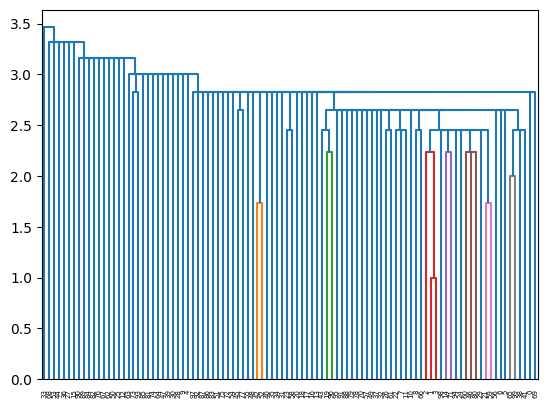

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

clust = linkage(list(test_data))
Dgram = dendrogram(clust)
plt.show()

In [11]:
training_data[0][4]

1

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=50)

C = km.fit_predict(list(test_data))

C:\Users\wwden\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
np.unique(C,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([ 283,  502, 1214,  236,  881,  549,  893,  276,  337,  895,  356,
         212,  480,  362,  988,  978,  772,  202,  377,  369,  624,  263,
         436,  270,  363,  297,  487,  432,  318,  828,  357,  273,  445,
         329,  375,  337,  358, 1524,  419,  447, 1034,  628,  521,  448,
         332,  932,  270,  450,  528,  343], dtype=int64))

In [9]:
from scipy.cluster.vq import vq, kmeans, whiten
K = [1,2,5,10,50,100,500,1000]
losss = []
for i in K:
    print(i)
    centers, loss = kmeans(list(test_data), i)
    
    losss.append(loss)



1
2
5
10
50
100
500
1000


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

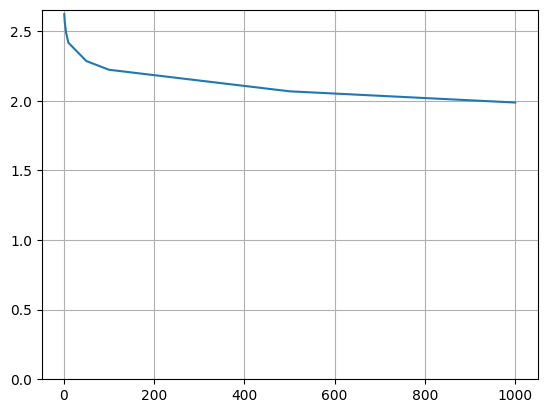

In [11]:
#it appears 50 clusters is optimal
f, ax = plt.subplots(1)
ax.plot(K, losss)
ax.set_ylim(ymin=0)
ax.grid()
plt.show(f)